In [138]:
!pip install qiskit
!pip install qiskit-aer
!pip install matplotlib

In [139]:
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram, circuit_drawer
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator

# Reversible implementation of Classical gates

## Implementing And gate using Toffoli gate (CCX)

In [140]:
def AND_circuit(input_bits=(0,0)):
    qc = QuantumCircuit(3, 1)
    # preparing input qubits
    if input_bits[0] == 1:
        qc.x(0)
    if input_bits[1] == 1:
        qc.x(1)
    # Use a Toffoli (CCX) gate on qubits 0,1 with qubit 2 as target. qubit 2 when measured gives 'and' of input bits
    qc.ccx(0, 1, 2)
    qc.barrier()
    qc.measure(2, 0)
    return qc

### building and running circuits and plotting results

In [141]:
circuits = []
for input_bits in [(0,0), (0,1), (1,0), (1,1)]:
    circuit = AND_circuit(input_bits=input_bits)
    circuits.append(circuit)

In [142]:
print(" And Circuit for inputs 0,0")
circuit_drawer(circuits[0], output='text')

 And Circuit for inputs 0,0


░    
q_0: ──■───░────
       │   ░    
q_1: ──■───░────
     ┌─┴─┐ ░ ┌─┐
q_2: ┤ X ├─░─┤M├
     └───┘ ░ └╥┘
c: 1/═════════╩═
              0

In [143]:
print(" And Circuit for inputs 0,1")
circuit_drawer(circuits[1], output='text')

 And Circuit for inputs 0,1


░    
q_0: ───────■───░────
     ┌───┐  │   ░    
q_1: ┤ X ├──■───░────
     └───┘┌─┴─┐ ░ ┌─┐
q_2: ─────┤ X ├─░─┤M├
          └───┘ ░ └╥┘
c: 1/══════════════╩═
                   0

In [144]:
print(" And Circuit for inputs 1,0")
circuit_drawer(circuits[2], output='text')

 And Circuit for inputs 1,0


┌───┐      ░    
q_0: ┤ X ├──■───░────
     └───┘  │   ░    
q_1: ───────■───░────
          ┌─┴─┐ ░ ┌─┐
q_2: ─────┤ X ├─░─┤M├
          └───┘ ░ └╥┘
c: 1/══════════════╩═
                   0

In [145]:
print(" And Circuit for inputs 1,1")
circuit_drawer(circuits[3], output='text')

 And Circuit for inputs 1,1


┌───┐      ░    
q_0: ┤ X ├──■───░────
     ├───┤  │   ░    
q_1: ┤ X ├──■───░────
     └───┘┌─┴─┐ ░ ┌─┐
q_2: ─────┤ X ├─░─┤M├
          └───┘ ░ └╥┘
c: 1/══════════════╩═
                   0

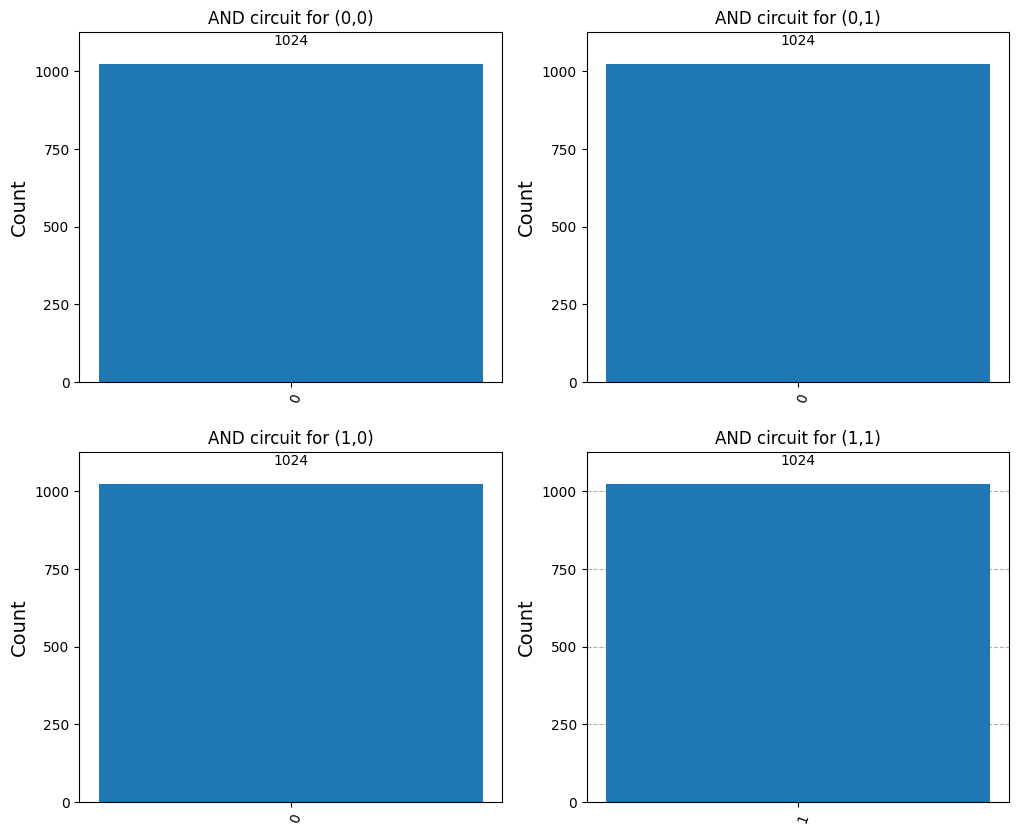

In [146]:
# Preparing plot area
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()  # flatten the 2D array for easier iteration
# giving titles to subplots
for i,t in enumerate(["AND circuit for (0,0)","AND circuit for (0,1)","AND circuit for (1,0)","AND circuit for (1,1)"]):
  axs[i].set_title(t)
# running each circuit on simulator and plotting
for i in range(4):
  # Transpile for simulator
  simulator = AerSimulator()
  circ = transpile(circuits[i], simulator)
  # Run and get counts
  result = simulator.run(circ,shots=1024).result()
  counts = result.get_counts(circ)
  plot_histogram(counts, ax=axs[i])

## Implementing Or gate using Toffoli gate (CCX)

In [147]:
def OR_circuit(input_bits=(0,0)):
    qc = QuantumCircuit(3, 1)
    # preparing input qubits
    if input_bits[0] == 1:
        qc.x(0)
    if input_bits[1] == 1:
        qc.x(1)
    # inverting both inputs
    qc.x(0)
    qc.x(1)
    # Use a Toffoli (CCX) gate on qubits 0,1 with qubit 2 as target. qubit 2 when measured gives 'Nor' of input bits
    qc.ccx(0, 1, 2)
    # inverting toffoli output for or
    qc.x(2)
    qc.barrier()
    qc.measure(2, 0)
    return qc

### building and running circuits and plotting results

In [148]:
circuits = []
for input_bits in [(0,0), (0,1), (1,0), (1,1)]:
    circuit = OR_circuit(input_bits=input_bits)
    circuits.append(circuit)

In [149]:
print(" Or Circuit for inputs 0,0")
circuit_drawer(circuits[0], output='text')

 Or Circuit for inputs 0,0


┌───┐           ░    
q_0: ┤ X ├──■────────░────
     ├───┤  │        ░    
q_1: ┤ X ├──■────────░────
     └───┘┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─────┤ X ├┤ X ├─░─┤M├
          └───┘└───┘ ░ └╥┘
c: 1/═══════════════════╩═
                        0

In [150]:
print(" Or Circuit for inputs 0,1")
circuit_drawer(circuits[1], output='text')

 Or Circuit for inputs 0,1


┌───┐                ░    
q_0: ┤ X ├───────■────────░────
     ├───┤┌───┐  │        ░    
q_1: ┤ X ├┤ X ├──■────────░────
     └───┘└───┘┌─┴─┐┌───┐ ░ ┌─┐
q_2: ──────────┤ X ├┤ X ├─░─┤M├
               └───┘└───┘ ░ └╥┘
c: 1/════════════════════════╩═
                             0

In [151]:
print(" Or Circuit for inputs 1,0")
circuit_drawer(circuits[2], output='text')

 Or Circuit for inputs 1,0


┌───┐┌───┐           ░    
q_0: ┤ X ├┤ X ├──■────────░────
     ├───┤└───┘  │        ░    
q_1: ┤ X ├───────■────────░────
     └───┘     ┌─┴─┐┌───┐ ░ ┌─┐
q_2: ──────────┤ X ├┤ X ├─░─┤M├
               └───┘└───┘ ░ └╥┘
c: 1/════════════════════════╩═
                             0

In [152]:
print(" Or Circuit for inputs 1,1")
circuit_drawer(circuits[3], output='text')

 Or Circuit for inputs 1,1


┌───┐┌───┐           ░    
q_0: ┤ X ├┤ X ├──■────────░────
     ├───┤├───┤  │        ░    
q_1: ┤ X ├┤ X ├──■────────░────
     └───┘└───┘┌─┴─┐┌───┐ ░ ┌─┐
q_2: ──────────┤ X ├┤ X ├─░─┤M├
               └───┘└───┘ ░ └╥┘
c: 1/════════════════════════╩═
                             0

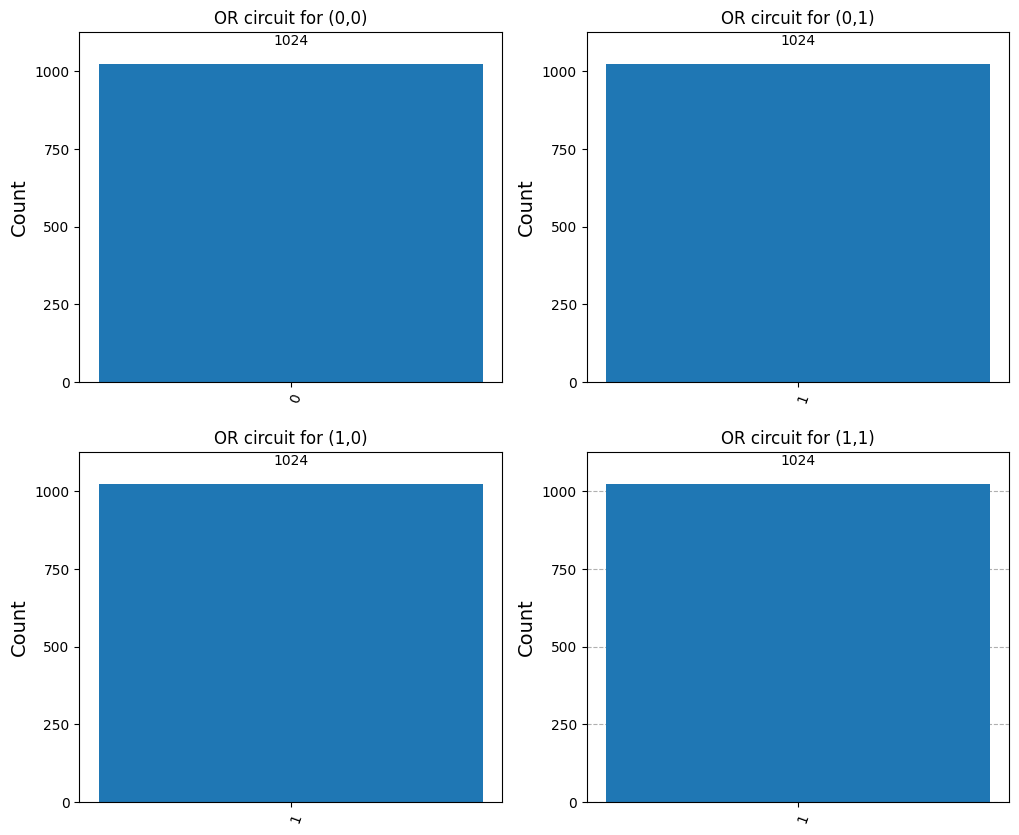

In [153]:
# Preparing plot area
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()  # flatten the 2D array for easier iteration
# giving titles to subplots
for i,t in enumerate(["OR circuit for (0,0)","OR circuit for (0,1)","OR circuit for (1,0)","OR circuit for (1,1)"]):
  axs[i].set_title(t)
# running each circuit on simulator and plotting
for i in range(4):
  # Transpile for simulator
  simulator = AerSimulator()
  circ = transpile(circuits[i], simulator)
  # Run and get counts
  result = simulator.run(circ,shots=1024).result()
  counts = result.get_counts(circ)
  plot_histogram(counts, ax=axs[i])

## Implementing XOR gate using Controlled Not

In [154]:
def XOR_circuit(input_bits=(0,0)):
    qc = QuantumCircuit(3, 1)
    # preparing input qubits
    if input_bits[0] == 1:
        qc.x(0)
    if input_bits[1] == 1:
        qc.x(1)
    # Use a CX gate on qubits 0,1 with qubit 1 as target. qubit 1 when measured gives 'XOR' of input bits
    qc.cx(0, 1)
    qc.barrier()
    qc.measure(1, 0)
    return qc

### building and running circuits and plotting results

In [155]:
circuits = []
for input_bits in [(0,0), (0,1), (1,0), (1,1)]:
    circuit = XOR_circuit(input_bits=input_bits)
    circuits.append(circuit)

In [156]:
print(" XOR Circuit for inputs 0,0")
circuit_drawer(circuits[0], output='text')

 XOR Circuit for inputs 0,0


░    
q_0: ──■───░────
     ┌─┴─┐ ░ ┌─┐
q_1: ┤ X ├─░─┤M├
     └───┘ ░ └╥┘
q_2: ──────░──╫─
           ░  ║ 
c: 1/═════════╩═
              0

In [157]:
print(" XOR Circuit for inputs 0,1")
circuit_drawer(circuits[1], output='text')

 XOR Circuit for inputs 0,1


░    
q_0: ───────■───░────
     ┌───┐┌─┴─┐ ░ ┌─┐
q_1: ┤ X ├┤ X ├─░─┤M├
     └───┘└───┘ ░ └╥┘
q_2: ───────────░──╫─
                ░  ║ 
c: 1/══════════════╩═
                   0

In [158]:
print(" XOR Circuit for inputs 1,0")
circuit_drawer(circuits[2], output='text')

 XOR Circuit for inputs 1,0


┌───┐      ░    
q_0: ┤ X ├──■───░────
     └───┘┌─┴─┐ ░ ┌─┐
q_1: ─────┤ X ├─░─┤M├
          └───┘ ░ └╥┘
q_2: ───────────░──╫─
                ░  ║ 
c: 1/══════════════╩═
                   0

In [159]:
print(" XOR Circuit for inputs 1,1")
circuit_drawer(circuits[3], output='text')

 XOR Circuit for inputs 1,1


┌───┐      ░    
q_0: ┤ X ├──■───░────
     ├───┤┌─┴─┐ ░ ┌─┐
q_1: ┤ X ├┤ X ├─░─┤M├
     └───┘└───┘ ░ └╥┘
q_2: ───────────░──╫─
                ░  ║ 
c: 1/══════════════╩═
                   0

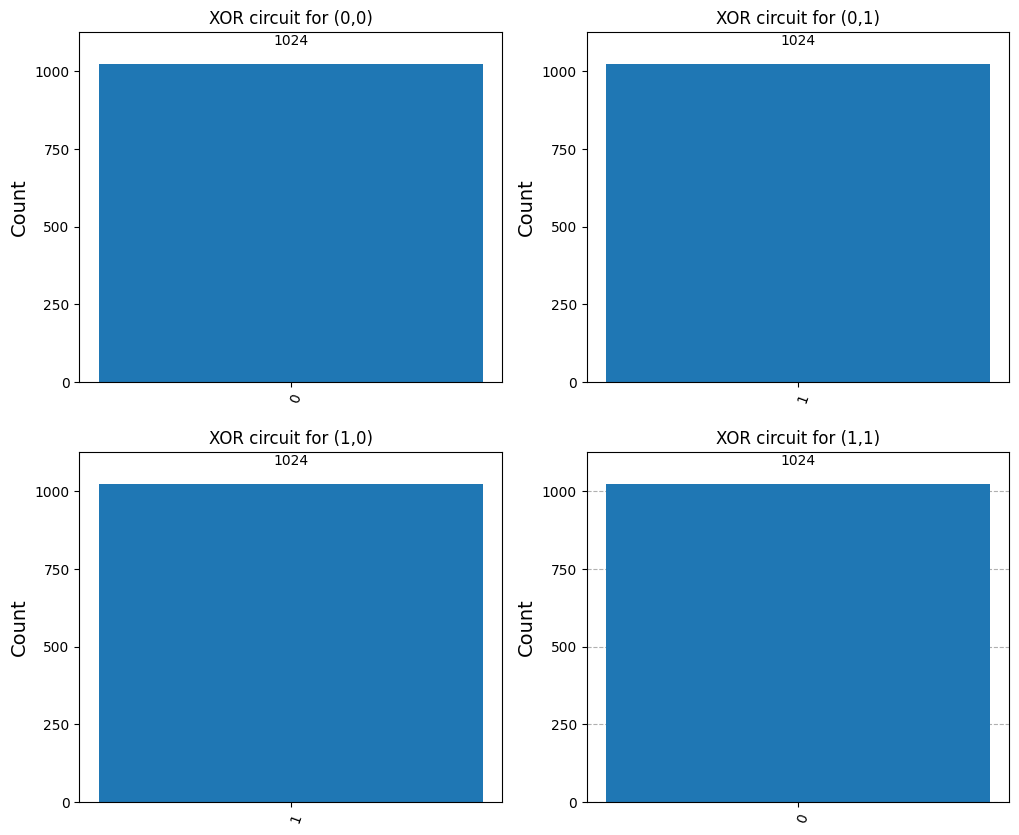

In [160]:
# Preparing plot area
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()  # flatten the 2D array for easier iteration
# giving titles to subplots
for i,t in enumerate(["XOR circuit for (0,0)","XOR circuit for (0,1)","XOR circuit for (1,0)","XOR circuit for (1,1)"]):
  axs[i].set_title(t)
# running each circuit on simulator and plotting
for i in range(4):
  # Transpile for simulator
  simulator = AerSimulator()
  circ = transpile(circuits[i], simulator)
  # Run and get counts
  result = simulator.run(circ,shots=1024).result()
  counts = result.get_counts(circ)
  plot_histogram(counts, ax=axs[i])

# NAND, NOR, XNOR

They all can be implemented by putting 'X' gate to the output qubit, of the implementation of their positive counterparts.

# Implementing Quantum Teleportation

We would try to teleport qubit :  0.866|0>+0.5|1>

In [161]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# preparing the qubit to be teleport
circuit.u(3.14 / 3, 0, 0, qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

# creating Alice and Bob entangled pair
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

# entangling both Alice's qubits (q0,q1)
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

# measuring both Alice's qubits
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])

# Bob applying X and Z based on values of classical bits
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cz(qreg_q[0], qreg_q[2])

# measuring Bob qubit
circuit.measure(qreg_q[2], creg_c[2])

In [162]:
circuit_drawer(circuit, output='text')

┌───────────────┐ ░            ░      ┌───┐ ░ ┌─┐              
q_0: ┤ U(1.0467,0,0) ├─░────────────░───■──┤ H ├─░─┤M├─────────■────
     └───────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐      │    
q_1: ──────────────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├──■───┼────
                       ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘┌─┴─┐ │ ┌─┐
q_2: ──────────────────░──────┤ X ├─░────────────░──╫──╫─┤ X ├─■─┤M├
                       ░      └───┘ ░            ░  ║  ║ └───┘   └╥┘
c: 3/═══════════════════════════════════════════════╩══╩══════════╩═
                                                    0  1          2

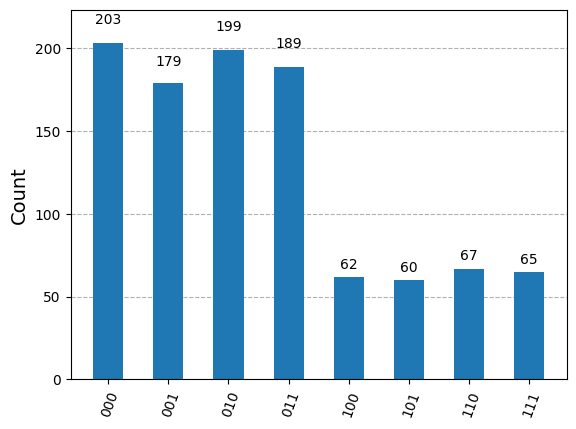

In [163]:
# Transpile for simulator
simulator = AerSimulator()
circ = transpile(circuit, simulator)
# Run and get counts
result = simulator.run(circ,shots=1024).result()
counts = result.get_counts(circ)
plot_histogram(counts)

Plotting the probability dist of Bob's qubit which resembles the dist. of qubit to be teleported

Counts for classical bit 2 : {'1': 254, '0': 770}


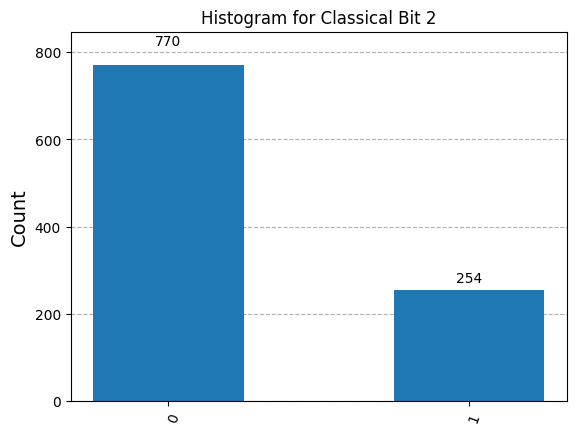

In [164]:

bit_index = 2  # 0 means the right-most bit in the string

# Initialize a dictionary to hold counts for that single bit.
single_bit_counts = {}

# Iterate over the full counts dictionary.
for bit_string, count in counts.items():
    # Extract the bit of interest.
    # Since Qiskit returns the bits with the rightmost bit corresponding to classical register 0,
    # we take the (-bit_index-1)-th character.
    bit_value = bit_string[-(bit_index + 1)]
    single_bit_counts[bit_value] = single_bit_counts.get(bit_value, 0) + count

print("Counts for classical bit", bit_index, ":", single_bit_counts)

# Plot the histogram for just that bit.
plot_histogram(single_bit_counts, title=f"Histogram for Classical Bit {bit_index}")


## Conclusion
The Teleportation program is also run with the same qubits on ibm kyiv using the ibm composer interface. the link for the same is : quantum.ibm.com/composer/files/new?initial=N4IgdghgtgpiBcIAqMA2MAOB7ATgFwjwEsswQAaEAExgGcBjHIjY0hECkARwlqnYDyABQCiAOQCKAQQDKAWQAEAJgB0ABgDcAHTBEw9VAFcaCrdzREARgEYVe%2Bme1gdXHDADmCrgG0AzAF0nRg8Fej9AnUMACgwiAHpfcgU1JLUASi9vNQiwSwgcJhgcTOykn2t-Mu8lHIALTIqggA8GysyapzyCoiKStvL%2B6pz6Fp9S1qd6sZyuwuLpqoqqjp1YXkM3PoUAWgA%2BUKyctdoNmFad-bDGnRHW5eGALz77p2PT9v8Lg5WyAF8gA

Job id: cyh0jwbrta1g008v8140

# Desnse Coding

In [165]:
circuits = []

## For sending bits 0,0

In [166]:
qreg_q = QuantumRegister(2, 'q')
creg_c0 = ClassicalRegister(2, 'c0')
circuit = QuantumCircuit(qreg_q, creg_c0)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.id(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c0[0])
circuit.measure(qreg_q[1], creg_c0[1])
circuits.append(circuit)
circuit_drawer(circuit, output='text')

┌───┐      ░ ┌───┐ ░      ┌───┐ ░ ┌─┐   
 q_0: ┤ H ├──■───░─┤ I ├─░───■──┤ H ├─░─┤M├───
      └───┘┌─┴─┐ ░ └───┘ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
 q_1: ─────┤ X ├─░───────░─┤ X ├──────░──╫─┤M├
           └───┘ ░       ░ └───┘      ░  ║ └╥┘
c0: 2/═══════════════════════════════════╩══╩═
                                         0  1

## For sending bits 0,1

In [167]:
qreg_q = QuantumRegister(2, 'q')
creg_c0 = ClassicalRegister(2, 'c0')
circuit = QuantumCircuit(qreg_q, creg_c0)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.z(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c0[0])
circuit.measure(qreg_q[1], creg_c0[1])
circuits.append(circuit)
circuit_drawer(circuit, output='text')

┌───┐      ░ ┌───┐ ░      ┌───┐ ░ ┌─┐   
 q_0: ┤ H ├──■───░─┤ Z ├─░───■──┤ H ├─░─┤M├───
      └───┘┌─┴─┐ ░ └───┘ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
 q_1: ─────┤ X ├─░───────░─┤ X ├──────░──╫─┤M├
           └───┘ ░       ░ └───┘      ░  ║ └╥┘
c0: 2/═══════════════════════════════════╩══╩═
                                         0  1

## For sending bits 1,0

In [168]:
qreg_q = QuantumRegister(2, 'q')
creg_c0 = ClassicalRegister(2, 'c0')
circuit = QuantumCircuit(qreg_q, creg_c0)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.x(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c0[0])
circuit.measure(qreg_q[1], creg_c0[1])
circuits.append(circuit)
circuit_drawer(circuit, output='text')

┌───┐      ░ ┌───┐ ░      ┌───┐ ░ ┌─┐   
 q_0: ┤ H ├──■───░─┤ X ├─░───■──┤ H ├─░─┤M├───
      └───┘┌─┴─┐ ░ └───┘ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
 q_1: ─────┤ X ├─░───────░─┤ X ├──────░──╫─┤M├
           └───┘ ░       ░ └───┘      ░  ║ └╥┘
c0: 2/═══════════════════════════════════╩══╩═
                                         0  1

## For sending bits 1,1

In [169]:
qreg_q = QuantumRegister(2, 'q')
creg_c0 = ClassicalRegister(2, 'c0')
circuit = QuantumCircuit(qreg_q, creg_c0)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.x(qreg_q[0])
circuit.z(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c0[0])
circuit.measure(qreg_q[1], creg_c0[1])
circuits.append(circuit)
circuit_drawer(circuit, output='text')

┌───┐      ░ ┌───┐┌───┐ ░      ┌───┐ ░ ┌─┐   
 q_0: ┤ H ├──■───░─┤ X ├┤ Z ├─░───■──┤ H ├─░─┤M├───
      └───┘┌─┴─┐ ░ └───┘└───┘ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
 q_1: ─────┤ X ├─░────────────░─┤ X ├──────░──╫─┤M├
           └───┘ ░            ░ └───┘      ░  ║ └╥┘
c0: 2/════════════════════════════════════════╩══╩═
                                              0  1

## Plotting results of simulation

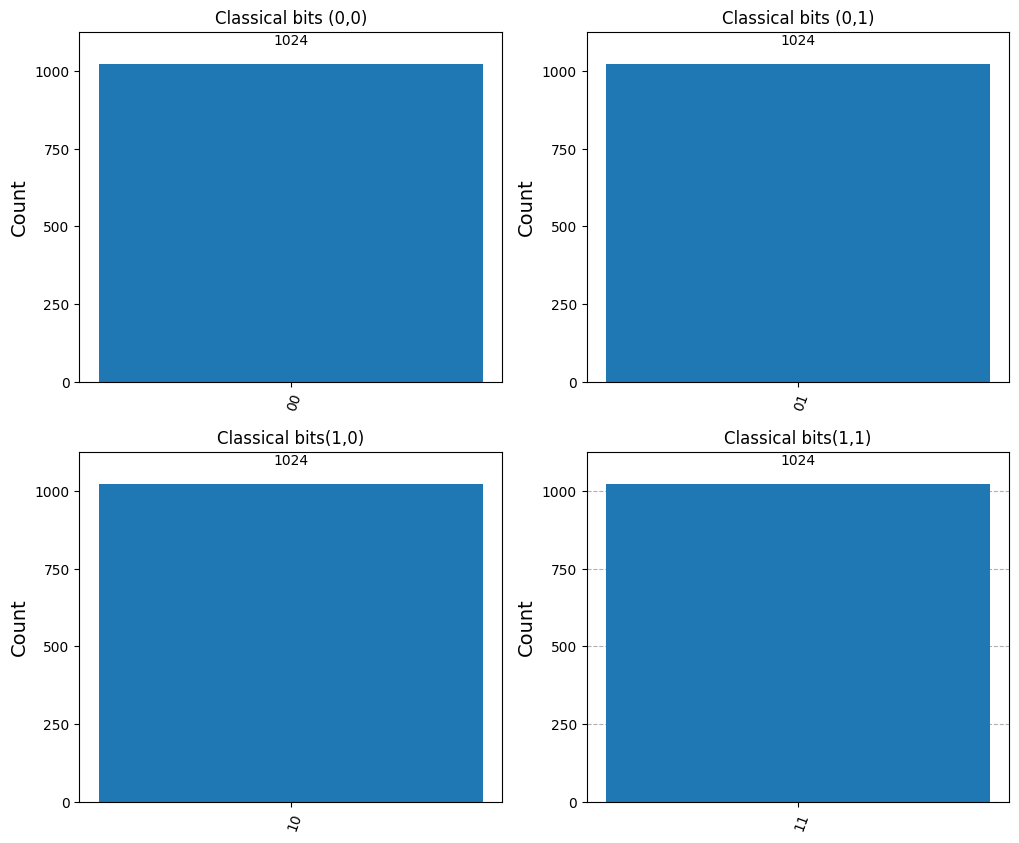

In [170]:
# Preparing plot area
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()  # flatten the 2D array for easier iteration
# giving titles to subplots
for i,t in enumerate(["Classical bits (0,0)","Classical bits (0,1)","Classical bits(1,0)","Classical bits(1,1)"]):
  axs[i].set_title(t)
# running each circuit on simulator and plotting
for i in range(4):
  # Transpile for simulator
  simulator = AerSimulator()
  circ = transpile(circuits[i], simulator)
  # Run and get counts
  result = simulator.run(circ,shots=1024).result()
  counts = result.get_counts(circ)
  plot_histogram(counts, ax=axs[i])

## Conclusion

The Dense coding program is run with random classical bits value on ibm kyiv using the ibm composer interface. the link for the same is :
quantum.ibm.com/composer/files/new?initial=N4IgdghgtgpiBcIAiMwGcYAIDCB7AJgJZgDmIANCPjGgMYBOhADgC6G5gIgUgCOEaKFwDyABQCiAOQCKAQQDKAWUwAmAHQAGANwAdMMVoAbAK7VMOvjEOEARgEY1Bi7rB7e9GCUy8A2gBYAXRcGT0xaOx87IL0Qr1oVSOiwWLCNHxUkgAtvHw0snIyXbN8AZiTaAA8cvPIcqJdYAWMPAoDMAFoAPjCIvJcbCHpGGHpqgNrfer1GtGasUrausIS%2BvUIAM0wACnDMAF49zDsASkwq31X9TZ2VfcOTzAAvMf7B4dGL8bry89yvyfyn1eQ0IIzGE0SDRgTRanw63VoaUuMzm33hqUhehAAF8gA

Job id: cyh10d901rbg008fre0g

# CHSH game

In [171]:
circuits = []

## When (x,y) = (0,0)

In [172]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)
#preparing epr pair
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1])
# alice's measurement
circuit.measure(qreg_q[0], creg_c[0])
# Bob's measurement
circuit.u(-3.14 / 4, 0, 0, qreg_q[1])
circuit.measure(qreg_q[1], creg_c[1])

circuits.append(circuit)
circuit_drawer(circuit, output='text')

┌───┐      ░ ┌─┐                    
q_0: ┤ H ├──■───░─┤M├────────────────────
     └───┘┌─┴─┐ ░ └╥┘┌───────────────┐┌─┐
q_1: ─────┤ X ├─░──╫─┤ U(-0.785,0,0) ├┤M├
          └───┘ ░  ║ └───────────────┘└╥┘
c: 2/══════════════╩═══════════════════╩═
                   0                   1

## When (x,y) = (0,1)

In [173]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# preparing epr pair
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1])
# Alice's measurement
circuit.measure(qreg_q[0], creg_c[0])
# Bob's measurement
circuit.u(3.14 / 4, 0, 0, qreg_q[1])
circuit.measure(qreg_q[1], creg_c[1])

circuits.append(circuit)
circuit_drawer(circuit, output='text')

┌───┐      ░ ┌─┐                   
q_0: ┤ H ├──■───░─┤M├───────────────────
     └───┘┌─┴─┐ ░ └╥┘┌──────────────┐┌─┐
q_1: ─────┤ X ├─░──╫─┤ U(0.785,0,0) ├┤M├
          └───┘ ░  ║ └──────────────┘└╥┘
c: 2/══════════════╩══════════════════╩═
                   0                  1

## When (x,y) = (1,0)

In [174]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# preparing epr pair
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1])
# Alice's measurement
circuit.u(-3.14 / 2, 0, 0, qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
# Bob's measurement
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.u(-3.14 / 4, 0, 0, qreg_q[1])
circuit.measure(qreg_q[1], creg_c[1])

circuits.append(circuit)
circuit_drawer(circuit, output='text')

┌───┐      ░ ┌──────────────┐┌─┐ ░                     
q_0: ┤ H ├──■───░─┤ U(-1.57,0,0) ├┤M├─░─────────────────────
     └───┘┌─┴─┐ ░ └──────────────┘└╥┘ ░ ┌───────────────┐┌─┐
q_1: ─────┤ X ├─░──────────────────╫──░─┤ U(-0.785,0,0) ├┤M├
          └───┘ ░                  ║  ░ └───────────────┘└╥┘
c: 2/══════════════════════════════╩══════════════════════╩═
                                   0                      1

## When (x,y) = (1,1)

In [175]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

#preparing entangled state
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1])

# Alice measurement
circuit.u(-3.14 / 2, 0, 0, qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
circuit.barrier(qreg_q[0], qreg_q[1])

#bob measurement
circuit.u(3.14 / 4, 0, 0, qreg_q[1])
circuit.measure(qreg_q[1], creg_c[1])

circuits.append(circuit)
circuit_drawer(circuit, output='text')

┌───┐      ░ ┌──────────────┐┌─┐ ░                    
q_0: ┤ H ├──■───░─┤ U(-1.57,0,0) ├┤M├─░────────────────────
     └───┘┌─┴─┐ ░ └──────────────┘└╥┘ ░ ┌──────────────┐┌─┐
q_1: ─────┤ X ├─░──────────────────╫──░─┤ U(0.785,0,0) ├┤M├
          └───┘ ░                  ║  ░ └──────────────┘└╥┘
c: 2/══════════════════════════════╩═════════════════════╩═
                                   0                     1

## Plotting results

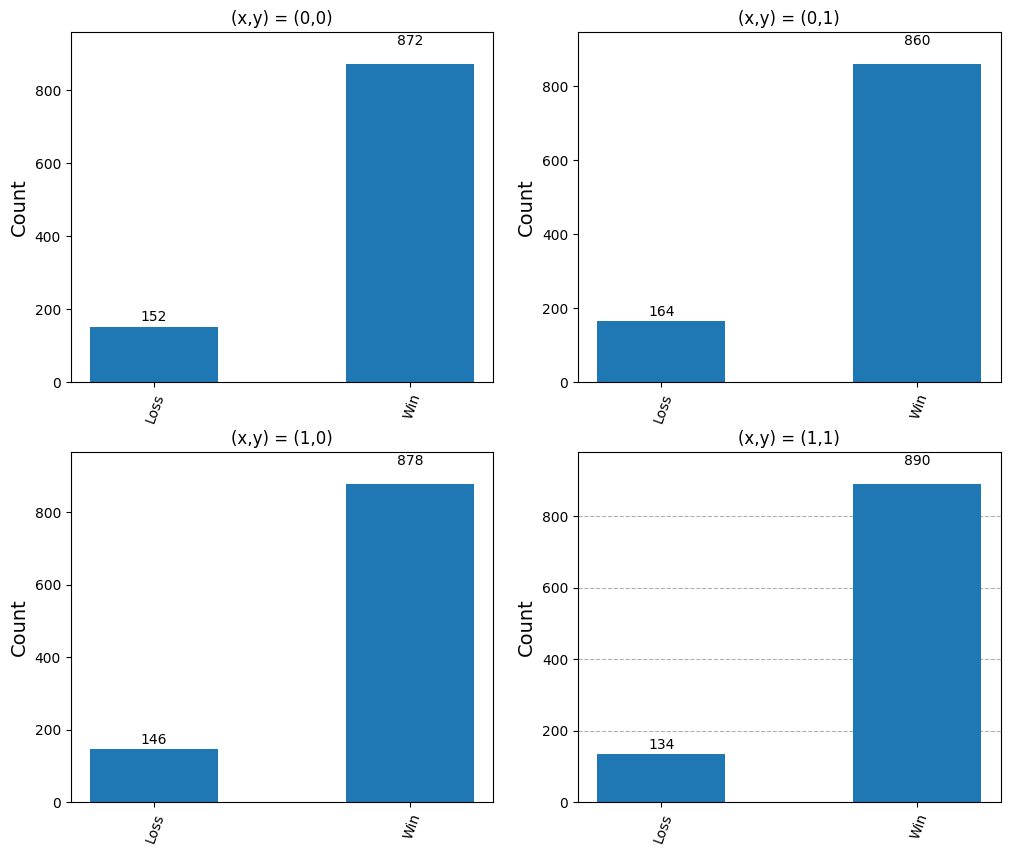

In [176]:
# Preparing plot area
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()  # flatten the 2D array for easier iteration
# giving titles to subplots
for i,t in enumerate(["(x,y) = (0,0)","(x,y) = (0,1)","(x,y) = (1,0)","(x,y) = (1,1)"]):
  axs[i].set_title(t)
for i in range(4):
  # Transpile for simulator
  simulator = AerSimulator()
  circ = transpile(circuits[i], simulator)
  # Run and get counts
  result = simulator.run(circ,shots=1024).result()
  counts = result.get_counts(circ)

  # Counting outcomes where the two qubits are the same vs. different to differentiate between win and loss
  same_count = 0
  different_count = 0

  for outcome, count in counts.items():
      if outcome[0] == outcome[1]:
          same_count += count
      else:
          different_count += count
  if (i<3):grouped_counts = {"Win": same_count, "Loss": different_count}
  else: grouped_counts = {"Win": different_count, "Loss": same_count}

  plot_histogram(grouped_counts, ax = axs[i])

## Conclusion
The CHSH game is run with (x,y) = (0,1) value on ibm brisbane using the ibm composer interface. the link for the same is : quantum.ibm.com/composer/files/new?initial=N4IgdghgtgpiBcIDCAJAyigBAc2jAziADQgAmBAxgE4CWADgC40D2YCIxIAjhPlOwHkACgFEAcgEUAgmgCymAEwA6AAwBuADpgaYCgBsAruUwbuMPTQBGARiU6KpzWC1cqMbJi4BtACwBdJ2p3TAprL2sArSCPChVwyN03GK8FBIALTy8VdMzUpwzvAGYEigAPTOyiTIinWF4DN1y-TABaAD4QsOzamHrGoub2kLjurUsIKloYKgq-Ku8arRoAM0wACljMAF4tzGsASkwDNZa6GgB6BSqVa8PvUbA6-AaYWdaOiiyE8cmaadn5vEnCt1qFtrsVIdjqcLj5rrdqgkQRtrOC9lC1mdznDMDdcXcgVoni9Ee8QoS2ABfIA

Job ID: cyh1x2mrta1g008v8aqg

# GHZ Game

## When (x,y,z) = (0,0,0)

In [177]:
circuits = []

In [178]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# Preparing GHZ state
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
# Doing respective measurements
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])

circuits.append(circuit)
circuit_drawer(circuit, output='text')

┌───┐           ░ ┌───┐┌─┐      
q_0: ┤ H ├──■────■───░─┤ H ├┤M├──────
     └───┘┌─┴─┐  │   ░ ├───┤└╥┘┌─┐   
q_1: ─────┤ X ├──┼───░─┤ H ├─╫─┤M├───
          └───┘┌─┴─┐ ░ ├───┤ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░─┤ H ├─╫──╫─┤M├
               └───┘ ░ └───┘ ║  ║ └╥┘
c: 3/════════════════════════╩══╩══╩═
                             0  1  2

# When (x,y,z) = (0,1,1)

In [179]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# Preparing GHZ state
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
# Doing respective measurements
circuit.sdg(qreg_q[0])
circuit.sdg(qreg_q[1])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])

circuits.append(circuit)
circuit_drawer(circuit, output='text')

┌───┐           ░ ┌─────┐┌───┐┌─┐   
q_0: ┤ H ├──■────■───░─┤ Sdg ├┤ H ├┤M├───
     └───┘┌─┴─┐  │   ░ ├─────┤├───┤└╥┘┌─┐
q_1: ─────┤ X ├──┼───░─┤ Sdg ├┤ H ├─╫─┤M├
          └───┘┌─┴─┐ ░ └┬───┬┘└┬─┬┘ ║ └╥┘
q_2: ──────────┤ X ├─░──┤ H ├──┤M├──╫──╫─
               └───┘ ░  └───┘  └╥┘  ║  ║ 
c: 3/═══════════════════════════╩═══╩══╩═
                                2   0  1

## When (x,y,z) = (1,0,1)

In [180]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# preparing GHZ state
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
# Doing respective measurements
circuit.sdg(qreg_q[0])
circuit.h(qreg_q[1])
circuit.sdg(qreg_q[2])
circuit.h(qreg_q[0])
circuit.h(qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[2], creg_c[2])

circuits.append(circuit)
circuit_drawer(circuit, output='text')

┌───┐           ░ ┌─────┐┌───┐ ░    ┌─┐   
q_0: ┤ H ├──■────■───░─┤ Sdg ├┤ H ├─░────┤M├───
     └───┘┌─┴─┐  │   ░ └┬───┬┘└───┘ ░ ┌─┐└╥┘   
q_1: ─────┤ X ├──┼───░──┤ H ├───────░─┤M├─╫────
          └───┘┌─┴─┐ ░ ┌┴───┴┐┌───┐ ░ └╥┘ ║ ┌─┐
q_2: ──────────┤ X ├─░─┤ Sdg ├┤ H ├─░──╫──╫─┤M├
               └───┘ ░ └─────┘└───┘ ░  ║  ║ └╥┘
c: 3/══════════════════════════════════╩══╩══╩═
                                       1  0  2

## When (x,y,z) = (1,1,0)

In [181]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# Preparing GHZ state
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

# Doing respective measurements
circuit.sdg(qreg_q[1])
circuit.h(qreg_q[1])
circuit.sdg(qreg_q[2])
circuit.h(qreg_q[0])
circuit.h(qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[2], creg_c[2])

circuits.append(circuit)
circuit_drawer(circuit, output='text')

┌───┐           ░  ┌───┐       ░    ┌─┐   
q_0: ┤ H ├──■────■───░──┤ H ├───────░────┤M├───
     └───┘┌─┴─┐  │   ░ ┌┴───┴┐┌───┐ ░ ┌─┐└╥┘   
q_1: ─────┤ X ├──┼───░─┤ Sdg ├┤ H ├─░─┤M├─╫────
          └───┘┌─┴─┐ ░ ├─────┤├───┤ ░ └╥┘ ║ ┌─┐
q_2: ──────────┤ X ├─░─┤ Sdg ├┤ H ├─░──╫──╫─┤M├
               └───┘ ░ └─────┘└───┘ ░  ║  ║ └╥┘
c: 3/══════════════════════════════════╩══╩══╩═
                                       1  0  2

## Plotting results

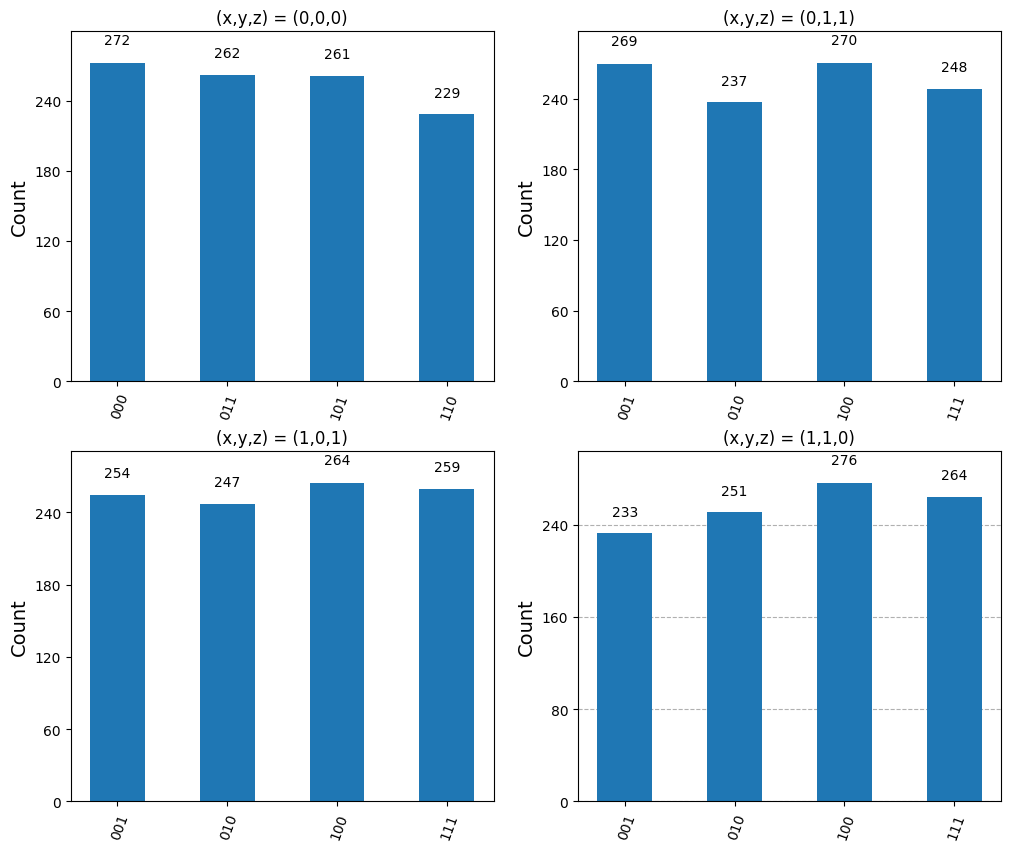

In [182]:
# Preparing plot area
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()  # flatten the 2D array for easier iteration
# giving titles to subplots
for i,t in enumerate(["(x,y,z) = (0,0,0)","(x,y,z) = (0,1,1)","(x,y,z) = (1,0,1)","(x,y,z) = (1,1,0)"]):
  axs[i].set_title(t)
for i in range(4):
  # Transpile for simulator
  simulator = AerSimulator()
  circ = transpile(circuits[i], simulator)
  # Run and get counts
  result = simulator.run(circ,shots=1024).result()
  counts = result.get_counts(circ)

  plot_histogram(counts, ax = axs[i])

## Conclusion
The GHZ game program with (x,y,z) = (0,1,1) values is also run on QPU using the composer interface. link is here: quantum.ibm.com/composer/files/new?initial=N4IgdghgtgpiBcIDiAJAWgAgObTgGhABMYBnAYwCcBLABwBcqB7MBEEAgRwhKlYHkACgFEAcgEUAggGUAshgBMAOgAMAbgA6YKmDIAbAK7EM6kBxi6qAIwCMi7WRMawmjhRhYMHANoBmALpOlO4YZL4BmgAWnl7K4ToAHtGxeNHWcWSJ3snR8nEkhB7eaU75hTFxUVkVOdVFcZYQFNQwFEl%2BKXUdXrlOsNz6bql%2BGAC0AHwhXsWafSQDMG2jE6GxvTD9g965S5M9miAAvkA

Job ID: cyh2yharta1g008v8er0